In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/
!unzip /content/drive/MyDrive/LP_recognition/data/train.zip

/content
Archive:  /content/drive/MyDrive/LP_recognition/data/train.zip
   creating: train/
   creating: train/train_detect/
  inflating: train/train_detect/args.yaml  
  inflating: train/train_detect/events.out.tfevents.1712660905.00f3e3c2e895.3104.0  
  inflating: train/train_detect/labels.jpg  
  inflating: train/train_detect/labels_correlogram.jpg  
  inflating: train/train_detect/results.csv  
  inflating: train/train_detect/train_batch0.jpg  
  inflating: train/train_detect/train_batch1.jpg  
  inflating: train/train_detect/train_batch2.jpg  
   creating: train/train_detect/weights/
  inflating: train/train_detect/weights/best.pt  
  inflating: train/train_detect/weights/best_detect.onnx  
  inflating: train/train_detect/weights/last.pt  
   creating: train/train_recog/
  inflating: train/train_recog/args.yaml  
  inflating: train/train_recog/confusion_matrix.png  
  inflating: train/train_recog/confusion_matrix_normalized.png  
  inflating: train/train_recog/events.out.tfevents.

In [ ]:
%cd /content/
!unzip /content/drive/MyDrive/LP_recognition/data/GreenParking_Detect.zip
!unzip /content/drive/MyDrive/LP_rrecognition/data/GreenParking_Recog.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: GreenParking_Detect/images/410.jpg  
  inflating: GreenParking_Detect/labels/980.txt  
  inflating: GreenParking_Detect/images/435.jpg  
  inflating: GreenParking_Detect/images/720.jpg  
  inflating: GreenParking_Detect/images/782.jpg  
  inflating: GreenParking_Detect/images/495.jpg  
  inflating: GreenParking_Detect/images/737.jpg  
  inflating: GreenParking_Detect/images/753.jpg  
  inflating: GreenParking_Detect/images/457.jpg  
  inflating: GreenParking_Detect/labels/999.txt  
  inflating: GreenParking_Detect/images/514.jpg  
  inflating: GreenParking_Detect/labels/1020.txt  
  inflating: GreenParking_Detect/images/747.jpg  
  inflating: GreenParking_Detect/labels/1052.txt  
  inflating: GreenParking_Detect/images/734.jpg  
  inflating: GreenParking_Detect/images/482.jpg  
  inflating: GreenParking_Detect/images/745.jpg  
  inflating: GreenParking_Detect/images/430.jpg  
  inflating: GreenParking_Detect/labels/1

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 11.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
!pip install onnxruntime-gpu

In [ ]:
import onnx
onnx_model_detect = onnx.load("/content/train/train_detect/weights/best_detect.onnx")
onnx.checker.check_model(onnx_model_detect)

In [ ]:
import onnxruntime as ort
import numpy as np
img = cv2.imread('/content/GreenParking_Detect/images/0.jpg')
ort_sess = ort.InferenceSession('/content/train/train_detect/weights/best_detect.onnx')
outputs = ort_sess.run(None, {'input': img})

# # Print Result
# predicted, actual = classes[outputs[0][0].argmax(0)], classes[y]
# print(f'Predicted: "{predicted}", Actual: "{actual}"')

ValueError: Required inputs (['images']) are missing from input feed (['input']).

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import time

In [ ]:
def process_image_blob(image, dim):
  scale = 1/255.0
  blob = cv2.dnn.blobFromImage(image, scale, dim, (0, 0, 0), True, crop=False)
  return blob

In [ ]:
img = cv2.imread('/content/GreenParking_Detect/images/0.jpg')
b = process_image_blob(img,(320,480))

In [ ]:
cv2.imshow(b)

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
def detect(img_inp,onnx_model_detect, conf=0.7):
  start = time.time()
  image_blob = process_image_blob(img_inp,(320,480))
  results_detect = onnx_model_detect(image_blob, imgsz=[320,480], conf=conf)
  x,y,w,h = map(int, results_detect[0].boxes.xyxy[0])
  # img = cv2.imread(img_inp)
  # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  img_crop = img_inp[y:h, x:w]
  end = time.time()
  return img_crop, end-start

In [ ]:
img_inp_recog = detect('/content/GreenParking_Detect/images/0.jpg')

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /content/train/train_detect/weights/best_detect.onnx for ONNX Runtime inference...
requirements: Ultralytics requirements ['onnx', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 252.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 MB 255.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 242.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 280.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 23.4s, installed 2 packages: ['onnx', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


image 1/1 /content/GreenParking_Detect/images/0.jpg: 320x480 1 LP, 257.9ms
Speed: 81.1ms preprocess, 257.9ms inference, 3431.2ms 

array([[[ 77,  37, 108],
        [101,  57, 128],
        [121,  78, 151],
        ...,
        [ 92,  68, 110],
        [ 91,  67, 107],
        [111,  88, 126]],

       [[ 70,  30, 101],
        [ 98,  55, 128],
        [128,  85, 158],
        ...,
        [100,  76, 116],
        [ 83,  60,  98],
        [ 96,  74, 109]],

       [[ 72,  33, 101],
        [ 95,  53, 124],
        [122,  80, 151],
        ...,
        [126, 104, 139],
        [104,  83, 116],
        [103,  82, 115]],

       ...,

       [[ 39,  21,  52],
        [ 46,  28,  59],
        [ 31,  13,  44],
        ...,
        [ 27,   6,  31],
        [ 33,  11,  39],
        [ 42,  20,  48]],

       [[ 39,  21,  52],
        [ 49,  31,  60],
        [ 42,  24,  55],
        ...,
        [ 27,   6,  31],
        [ 28,   6,  34],
        [ 33,  11,  39]],

       [[ 49,  31,  60],
        [ 41,  23,  52],
        [ 36,  18,  49],
        ...,
        [ 31,  10,  35],
        [ 33,  11,  39],
        [ 32,  10,  38]]], dtype=uint8)
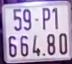

In [ ]:
img_inp_recog

In [ ]:
def recog(img_inp, onnx_model_recog, conf=0.5, iou=0.7):
  h_lp, _, _ = img_inp.shape
  start = time.time()
  ### check len of result
  count_num_of_loop = 0
  results_recog = onnx_model_recog(img_inp, imgsz=[96,75], conf=conf, line_width=1, iou=iou)
  while True:
    data_chars = results_recog[0].boxes.data

    count_num_of_loop += 1
    if count_num_of_loop > 10:
      print('error !!!')
      return
    print('number of loop: ', count_num_of_loop)

    if len(data_chars) < 8:
      results_recog = onnx_model_recog(img_inp, imgsz=[96,75], conf=conf-0.05, line_width=1, iou=iou+0.05)

    if len(data_chars) > 9:
      results_recog = sorted(results_recog, key=results_recog[0].boxes.conf)[:9]

    if len(data_chars) > 7 & len(data_chars) < 10:
      break


  lst_char_line_1 = []
  lst_char_line_2 = []
  for i in range(len(data_chars)):
    x, y, w, h = map(int, data_chars[i][:4])
    label = data_chars[i][-1:]
    conf = data_chars[i][4]
    if int(label) in results_recog[0].names.keys():
      label = results_recog[0].names[int(label)]
    tmp = [x, y, w, h, round(float(conf),4), label]

    if 0 < (y+h) / 2 < h_lp / 2:
      lst_char_line_1.append(tmp)
    else:
      lst_char_line_2.append(tmp)
  lst_char_line_1 = sorted(lst_char_line_1, key=lambda x:x[2])
  lst_char_line_2 = sorted(lst_char_line_2, key=lambda x:x[2])


  res_of_label = [*[x[5] for x in lst_char_line_1],"  ",*[y[5] for y in lst_char_line_2]]
  # res_of_label = ['5', 'D', '4', '1', '6', '6', '4', '8', '0']


  ## Heurictic rule
  char2num = {'A':'4', 'B': '8', 'D':'0', 'G':'6', 'S':'5', 'Z':'7'}
  num2char = {'0':'D', '2':'Z', '4':'A', '5':'S', '6':'G', '7':'Z', '8':'B'}
  for idx, ele in enumerate(res_of_label):
    if idx == 2:
      if ele in num2char.keys():
        res_of_label[idx] = num2char[ele]
        print(res_of_label)
    else:
      if ele in char2num.keys():
        res_of_label[idx] = char2num[ele]

  res_of_label = ''.join(res_of_label)

  end = time.time()

  return res_of_label, end-start

In [ ]:
r1 = recog(img_inp_recog)

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /content/train/train_recog/weights/best_recog.onnx for ONNX Runtime inference...

WARNING ⚠️ imgsz=[96, 75] must be multiple of max stride 32, updating to [96, 96]
0: 96x96 1 0, 1 1, 1 4, 1 5, 2 6s, 1 8, 1 9, 1 P, 12.2ms
Speed: 0.4ms preprocess, 12.2ms inference, 1.5ms postprocess per image at shape (1, 3, 96, 96)
number of loop:  1


In [ ]:
def load_model(path_onnx_model_detect, path_onnx_model_recog):
  onnx_model_detect = YOLO(path_onnx_model_detect)
  onnx_model_recog = YOLO(path_onnx_model_recog)
  return onnx_model_detect, onnx_model_recog

In [ ]:
def end2end(image):
  MDetect, MRecog = load_model('/content/train/train_detect/weights/best_detect.onnx', '/content/train/train_recog/weights/best_recog.onnx')
  res_of_detect, t_detect = detect(image, MDetect)
  print(t_detect)
  print('-----------')
  res_of_recog, t_recog = recog(res_of_detect, MRecog)
  print(t_recog)
  print('-----------')
  return res_of_detect, res_of_recog, t_detect+t_recog

In [ ]:
image = cv2.imread('/content/GreenParking_Detect/images/0.jpg')
r1, r2, t = end2end(image)

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /content/train/train_detect/weights/best_detect.onnx for ONNX Runtime inference...



InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Got invalid dimensions for input: images for the following indices
 index: 2 Got: 640 Expected: 320
 index: 3 Got: 640 Expected: 480
 Please fix either the inputs/outputs or the model.

In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 11.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [5]:
from ultralytics import YOLO
model = YOLO(f"/content/train/train_detect/weights/best.pt")
input_width = 470
input_height = 300
optimize_cpu = False

model.export(format="onnx", imgsz=[input_height, input_width], optimize=optimize_cpu)

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
WARNING ⚠️ imgsz=[300, 470] must be multiple of max stride 32, updating to [320, 480]
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/train/train_detect/weights/best.pt' with input shape (1, 3, 320, 480) BCHW and output shape(s) (1, 5, 3150) (64.1 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 140.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.2s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 11.1s, saved as '/content/train/train_detect/weights/best.onnx' (42.5 MB)

Export complete (13.6s)
Results saved to /content/train/train_detect/weights
Predict:         yolo predict task=detec

'/content/train/train_detect/weights/best.onnx'

In [6]:
from ultralytics import YOLO
model = YOLO(f"/content/train/train_recog/weights/best.pt")
input_width = 85
input_height = 75
optimize_cpu = False

model.export(format="onnx", imgsz=[input_height,input_width], optimize=optimize_cpu)

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
WARNING ⚠️ imgsz=[75, 85] must be multiple of max stride 32, updating to [96, 96]
Model summary (fused): 168 layers, 11137581 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/train/train_recog/weights/best.pt' with input shape (1, 3, 96, 96) BCHW and output shape(s) (1, 35, 189) (21.4 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 1.0s, saved as '/content/train/train_recog/weights/best.onnx' (42.5 MB)

Export complete (2.5s)
Results saved to /content/train/train_recog/weights
Predict:         yolo predict task=detect model=/content/train/train_recog/weights/best.onnx imgsz=96  
Validate:        yolo val task=detect model=/content/train/train_recog/weights/best.onnx imgsz=96 data=/content/ultralytics/data/mydataset.yaml  
Visualize:       https://netron.app


'/content/train/train_recog/weights/best.onnx'